<a href="https://colab.research.google.com/github/faruthem/CRUD/blob/development/perritos%20y%20gatitos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Clasificador de perros y gatos con Tensorflow

In [1]:
import tensorflow as tf #importamos tensorflow
import tensorflow_datasets as tfds

#Descargamos el set de datos de perros y gatos
datos, metadatos = tfds.load('cats_vs_dogs',as_supervised=True, with_info=True)


Ahora mostraremos nuetro Dataset

In [2]:
metadatos

tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.0',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_path='~/tensorflow_datasets/cats_vs_dogs/4.0.0',
    file_format=tfrecord,
    download_size=786.67 MiB,
    dataset_size=689.64 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'image/filename': Text(shape=(), dtype=tf.string),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=8>,
    },
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, John (JD) and Howell, Jon and

,image,label
0,,1 (dog)
1,,1 (dog)
2,,1 (dog)
3,,0 (cat)
4,,1 (dog)

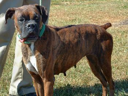
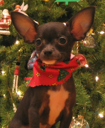
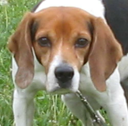
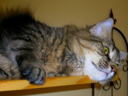
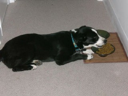

In [3]:
from tensorflow_datasets.core.dataset_info import Metadata
#Experimentemos con nuestro dataset
#Tomando 5 datos de nuestro modelo descargado
tfds.as_dataframe(datos['train'].take(5),metadatos)

Intentaremos lo mismo pero ahora con una opción mucho más estetica que permite el uso de etiquetas para una vista mucho más estetica.

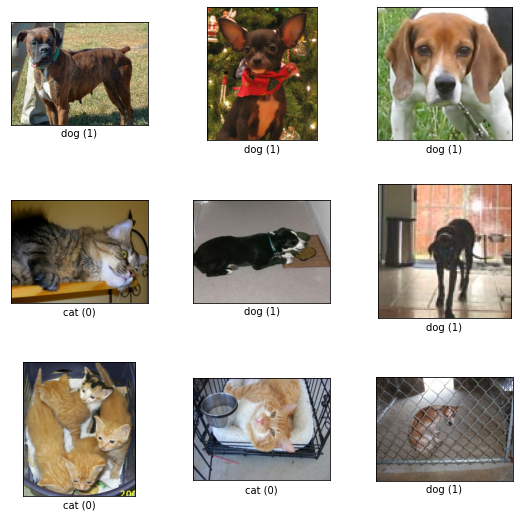

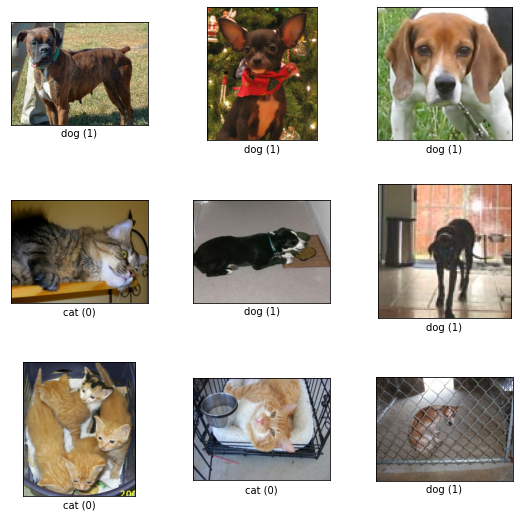

In [4]:
tfds.show_examples(datos['train'],metadatos)

La siguiente función nos permite tener un control conpleto de lo que observamos y el cómo lo observamos

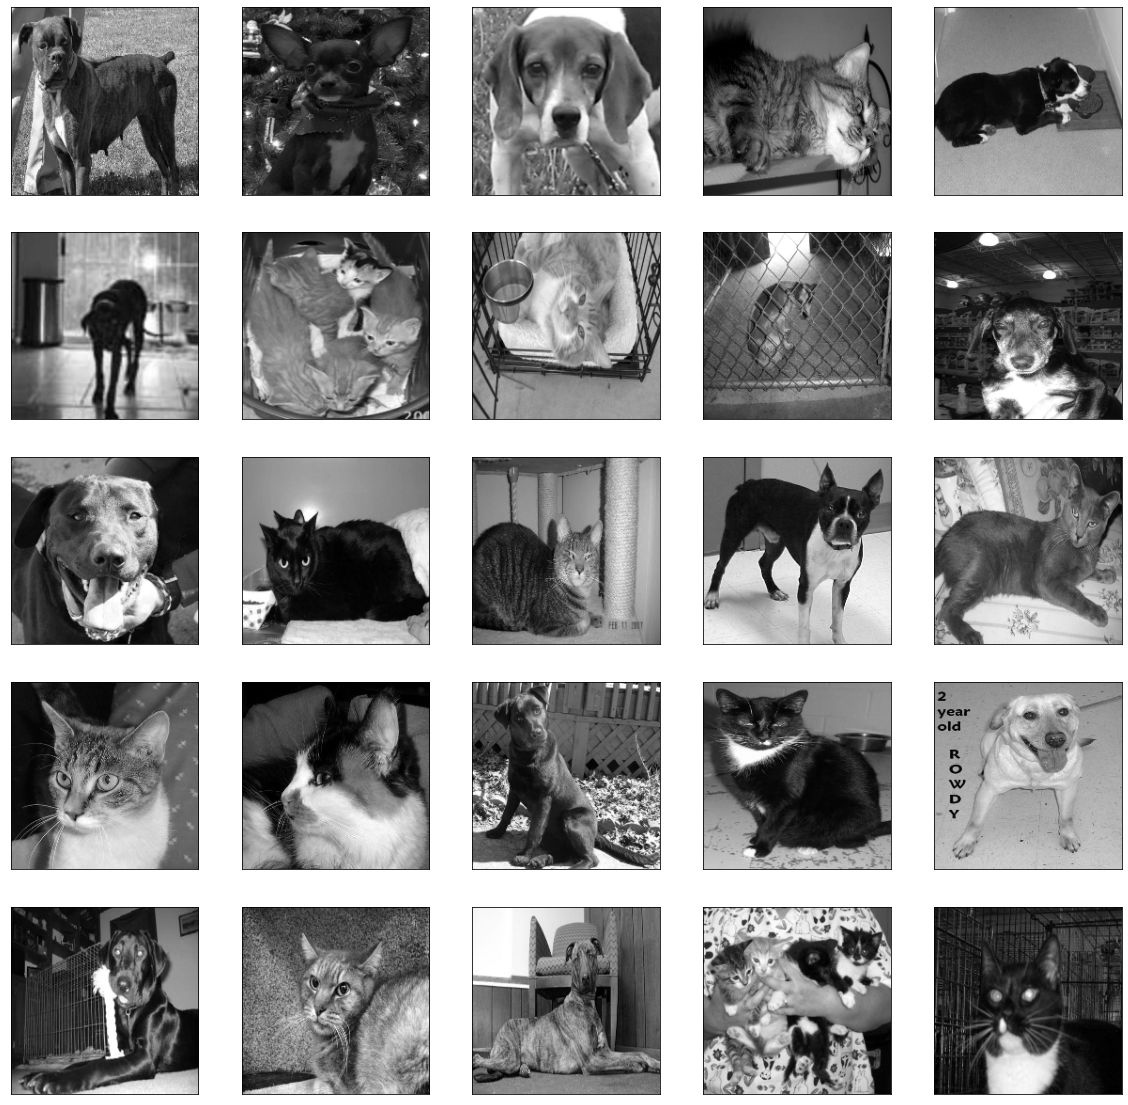

In [5]:
import matplotlib.pyplot as plt#Importanto libreria de matplotlib para mostrar imagenes
import cv2 # Esta librería nos sirve para modificar el tamaño d nuestras imagenes para que puedan ser procesadas más adelante
#Agregamos un ciclo for para lograr ver todos los datos
#El for recibe el indice y el par con su etiquea y digo que solo quiero uno e los datos
plt.figure(figsize=(20,20))# aquí modificamos el tamaño de nuestras imagenes a 20x20
for i, (imagen, etiqueta) in enumerate(datos['train'].take(25)):
  TAMANO_IMG =200 #Defino el tamaño que mis imagenes van a tener
  imagen = cv2.resize(imagen.numpy(), (TAMANO_IMG,TAMANO_IMG))#Modificando tamaño de mi hermana
  imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)#Vuelve nuestras imagenes verdes
  plt.subplot(5,5,i+1)
  plt.xticks([])#Elemento vacío
  plt.yticks([])#Elemento vacío
  plt.imshow(imagen, cmap = 'gray')# Muestra las imagenes


Vamos a crear nuestros sets de entrenamiento

In [6]:
datos_entrenamiento = []

In [7]:
# Iteración de todos mis datos de entrenamiento
for i, (imagen, etiqueta) in enumerate(datos['train']): #Todos mis datos de entrenamiento
  #TAMANO_IMG =200 #Defino el tamaño que mis imagenes van a tener
  imagen = cv2.resize(imagen.numpy(), (TAMANO_IMG,TAMANO_IMG))#Modificando tamaño de mi hermana
  imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)#Vuelve nuestras imagenes verdes
  imagen = imagen.reshape(TAMANO_IMG,TAMANO_IMG, 1)#Cambiar tamaño a 100 100 1
  datos_entrenamiento.append([imagen,etiqueta])

In [8]:
#Imprimos datos de entrenamiento
datos_entrenamiento[0]

[array([[[246],
         [239],
         [217],
         ...,
         [179],
         [162],
         [133]],
 
        [[242],
         [236],
         [197],
         ...,
         [170],
         [169],
         [162]],
 
        [[239],
         [226],
         [169],
         ...,
         [146],
         [167],
         [168]],
 
        ...,
 
        [[159],
         [169],
         [131],
         ...,
         [189],
         [130],
         [119]],
 
        [[120],
         [142],
         [128],
         ...,
         [ 78],
         [104],
         [ 58]],
 
        [[101],
         [126],
         [131],
         ...,
         [ 49],
         [ 62],
         [ 48]]], dtype=uint8), <tf.Tensor: shape=(), dtype=int64, numpy=1>]

In [9]:
len(datos_entrenamiento)#Longitud de mi arreglo

23262

PREPARAMOS MEJOR LOS DATOS PARA MI ARREGLO

In [10]:
X = []#Imagenes de entrada (pixeles)
y = []#Etiquetas (Perro o gato)
#Iteración para que cada variable tenga una variable correspondiente
for imagen, etiqueta in datos_entrenamiento:
  X.append(imagen)
  y.append(etiqueta)

In [11]:
X

[array([[[246],
         [239],
         [217],
         ...,
         [179],
         [162],
         [133]],
 
        [[242],
         [236],
         [197],
         ...,
         [170],
         [169],
         [162]],
 
        [[239],
         [226],
         [169],
         ...,
         [146],
         [167],
         [168]],
 
        ...,
 
        [[159],
         [169],
         [131],
         ...,
         [189],
         [130],
         [119]],
 
        [[120],
         [142],
         [128],
         ...,
         [ 78],
         [104],
         [ 58]],
 
        [[101],
         [126],
         [131],
         ...,
         [ 49],
         [ 62],
         [ 48]]], dtype=uint8), array([[[152],
         [172],
         [172],
         ...,
         [ 67],
         [ 77],
         [ 84]],
 
        [[146],
         [173],
         [106],
         ...,
         [ 81],
         [ 87],
         [ 76]],
 
        [[142],
         [138],
         [ 83],
         ...,
       

NORMALIZAMOS NUESTROS DATOS

In [12]:
import numpy as np
X = np.array(X).astype(float) / 255 #Lo convierto en numero y lo convierto en un número flotante

In [13]:
#Convierto y en un arreglo de numpy, ya que hasta ahora eran puros tensores
y = np.array(y)

In [14]:
#Imprimmos x para ver sus entradas y vemos que son imagenes de 200x200 
X.shape

(23262, 200, 200, 1)

ENTRENAMIENTO DEL MODELO (ARQUITECTURA Y PARAMETROS)

Comenzamos probando el modelo ***DENSO*** y 2 modelos ***CONVOLUCIONALES***

In [20]:
modeloDenso = tf.keras.models.Sequential([ #Capa de entrada recibe 100 px
    tf.keras.layers.Flatten(input_shape=(100,100,1)),
    tf.keras.layers.Dense(150, activation = 'relu'), #capas dentas de 150 px
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid'), #indicamos activación sigmoide
])
#MODELO CONVOLUCIONAL
modeloCNN = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])
#Modelo convolucional 2 pero con un drop de 250 Neuronas
modeloCNN2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),

  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(250, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])


In [21]:
#Compilamos modelos con el optimizador ADAM
#Compilar modelos. Usar crossentropy binario ya que tenemos solo 2 opciones (perro o gato)
modeloDenso.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

modeloCNN.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

modeloCNN2.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

Agrego TensorBoard para ver modelos graficos de mis distintos modelos